In [5]:
!pip install wordcloud

In [3]:
!pip install nltk

In [6]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# text preprocessing modules
from string import punctuation

# sklearn module
from sklearn.feature_extraction.text import CountVectorizer

#wordcloud
from wordcloud import WordCloud

from collections import Counter

# text preprocessing modules
import nltk
from nltk.tokenize import word_tokenize

import re  #regular expression
import emoji

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

import warnings

warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

In [4]:
!pip install emoji

                                              0.0/361.8 kB ? eta -:--:--
     ---                                   30.7/361.8 kB 660.6 kB/s eta 0:00:01
     ----                                  41.0/361.8 kB 495.5 kB/s eta 0:00:01
     ---------                             92.2/361.8 kB 751.6 kB/s eta 0:00:01
     --------------                       143.4/361.8 kB 774.0 kB/s eta 0:00:01
     -----------------------                225.3/361.8 kB 1.1 MB/s eta 0:00:01
     -----------------------                225.3/361.8 kB 1.1 MB/s eta 0:00:01
     ---------------------------          276.5/361.8 kB 896.4 kB/s eta 0:00:01
     ------------------------------------ 361.8/361.8 kB 979.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (py

In [11]:
# load the dataset 
data = pd.read_csv("../Data/swahili_news_titles.csv")

In [12]:
# show the shape of the dataset
data.shape 

(31024, 1)

In [5]:
# show the first 10 rows
data.head(10) 

,headlines
0,MA-DC WAWILI KIKAANGONI
1,Ruangwa yafanya kweli miradi ya maji
2,Marekani yaishuku Urusi kukiuka mkataba wa nyuklia
3,Watumishi wa umma kuula
4,CCM YATOA SIRI YA USHINDI UCHAGUZI MDOGO
5,Vifaa Yanga kupishana U/Ndege Dar
6,Cardi B amjaribu Minaj kwa Meek Mill
7,DALEY BLIND AFURAHIA KUJIUNGA AJAX
8,Uchaguzi mitaa wafanyika kwa utulivu
9,RAIS ATOA NENO ZITO KWA MAHASIMU WA JK


## Cleaning the Dataset

Cleaning text-data is a typical pre-processing task for data science and machine learning.

It consists of getting rid of the less useful parts of text through stopword removal, dealing with capitalization, special characters and other details.

### 1. Check Missing values

In [13]:
# check missing values using isnull method

data.isnull().sum() 

headlines    0
dtype: int64

The dataset does not have any missing values

### 2. Remove Numbers and Links

In [18]:
# create the function 
def remove_digits(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'http\S+', '', text)
    
    return text 

# apply the function
data['headlines'] = data['headlines'].apply(remove_digits)

### 3. Remove Punctuation

In [17]:
# create the function 
def remove_punc(text):
    text = ''.join([c for c in text if c not in punctuation])
    
    return text 


# apply the function 

data['headlines'] = data['headlines'].apply(remove_punc)

### 4. Normalize case into Lower Case

In [19]:
# convert the text to lowercase
data['headlines'] = data['headlines'].str.lower() 

### 5. Remove Stopwords 

In natural language processing (NLP), stopwords are commonly used words such as articles (e.g., "the," "a"), prepositions (e.g., "in," "on"), and pronouns (e.g., "he," "she") that often appear frequently in text but carry little to no meaningful information for analysis. Removing stopwords is important in NLP tasks to improve the quality and efficiency of text processing. 

By eliminating these commonly occurring words, we can reduce noise and focus on the more informative and contextually significant words. This can help in tasks such as text classification, sentiment analysis, topic modeling, and information retrieval, where the goal is to extract meaningful patterns and insights from text data while disregarding the less significant and frequently occurring words.

In [28]:
# list of swahili stop words
swahili_stopwords = [
    'akasema', 'alikuwa', 'alisema', 'baada', 'basi', 'bila', 'cha', 'chini',
    'hadi', 'hapo', 'hata', 'hivyo', 'hiyo', 'huku', 'huo', 'ila', 'ili',
    'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila', 'kima', 'kisha',
    'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la',
    'lakini', 'mara', 'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda',
    'mwenye', 'na', 'naye', 'ndani', 'ni', 'nini', 'nonkungu', 'pamoja', 'pia',
    'sana', 'sasa', 'sauti', 'tafadhali', 'tena', 'tu', 'vile', 'wa', 'wakati',
    'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'hivi', 'huu',
    'hii', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'vya', 'za', 't', 'co',
    'kuna', 'nie', 'kati', 'ile', 'tz', 'au', 'tanzania', 'zaidi', 'zake',
    'si', 'mm', 'ndo', 'hapa', 'je', 'hawa', 'nyie', 'wewe', 'hiki', 'but',
    'my', 'to', 'baadhi', 'weka', 'mungu', 'poa', 'wenu', 'kabla', 'is',
    'kaka', 'wana', 'jinsi', 'siku', 'ndio', 'sio', 'ee', 'eti', 'wako',
    'wengi', 'wapi', 'yako', 'saa','ðÿ'
]

In [27]:
# function to remove stopwords 

def remove_stopwords(text):
    text = text.split()
    text = [w for w in text if not w in swahili_stopwords]
    text = " ".join(text)
    
    return text
    

In [29]:
# remove stopwords
data['headlines'] = data['headlines'].apply(remove_stopwords)


### 6. Replace Values

In [30]:
# create a function 
def replace_value(text):
    text = re.sub(r'madc','kiongozi', text)
    
    return text 

# apply the function

data['headlines'] = data['headlines'].apply(replace_value)

### 7. Remove Emojis

 Emojis are graphical representations that often carry subjective meanings or emotions, which can add noise or ambiguity to text analysis. Since NLP models typically operate on textual data, removing emojis helps standardize the input by focusing solely on the textual content.
 
Also, emojis can vary across platforms or devices, leading to inconsistencies in their representation or encoding. Removing emojis ensures consistent text processing across different sources or systems. 

In [31]:
#create function
def remove_emoji(text):
    # Remove emojis using the emoji library
    text = emoji.get_emoji_regexp().sub("", text)
    return text

#apply the function
data['headlines'] = data['headlines'].apply(remove_emoji)

AttributeError: module 'emoji' has no attribute 'get_emoji_regexp'

In [33]:
emoji.__version__

'2.7.0'

In [15]:
# show cleaned headlines

data.head(10)

,headlines
0,kiongozi wawili kikaangoni
1,ruangwa yafanya kweli miradi maji
2,marekani yaishuku urusi kukiuka mkataba nyuklia
3,watumishi umma kuula
4,ccm yatoa siri ushindi uchaguzi
5,vifaa yanga kupishana undege dar
6,cardi b amjaribu minaj meek mill
7,daley blind afurahia kujiunga ajax
8,uchaguzi mitaa wafanyika utulivu
9,rais atoa neno zito mahasimu jk


## Text Analysis

### 1. Total Words

Find the total number of words in the collection of all documents

In [34]:
# Split headlines into words

headlines = data['headlines']

words = headlines.str.split()

# Calculate total number of words
total_words = words.apply(len).sum()

# Print the results
print("Total number of words:", total_words)

Total number of words: 155764


### 2. Unique Words

Find total number of uniques words presented in the collection of all documents

In [36]:
# Calculate total number of unique words
unique_words = set([word for sublist in words for word in sublist])
total_unique_words = len(unique_words)

print("Total number of unique words:", total_unique_words)

Total number of unique words: 23200


### 3.Visualize Top Words

Visualizing the top words allows you to quickly identify the most frequently occurring terms in the text corpus. This can provide a high-level overview of the prominent topics or themes present in the data

In [37]:
# collect all words presented in the collection of documents(headlines)
corpus = []
headlines = data['headlines'].str.split()
headlines = headlines.values.tolist()
corpus = [word for i in headlines for word in i]

<AxesSubplot:>

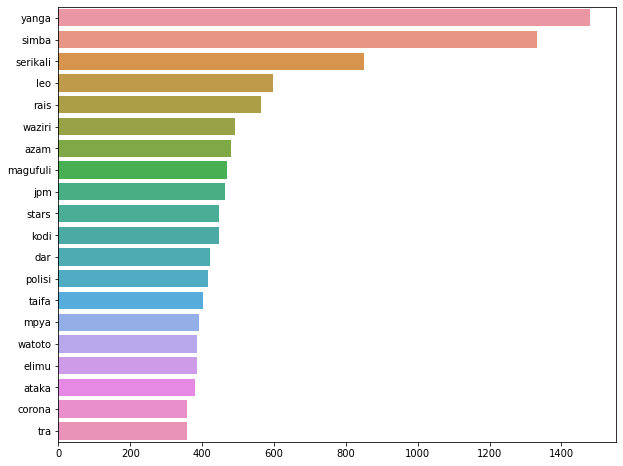

In [19]:
# visualize the top 20 words
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:20]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(10,8))
sns.barplot(x=y, y=x)

### 4. Explore With WordCloud

A word cloud is a popular visual representation in NLP (Natural Language Processing) that displays the most frequent words in a text corpus. It provides a way to visually summarize and highlight the important or prominent words based on their frequency of occurrence.

In [41]:
# function to explore wordcloud
def explore_wordcloud(data):
    wordcloud = WordCloud(background_color='white',
                          max_words=50,
                          max_font_size=20,
                          scale=3,
                          random_state=134)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

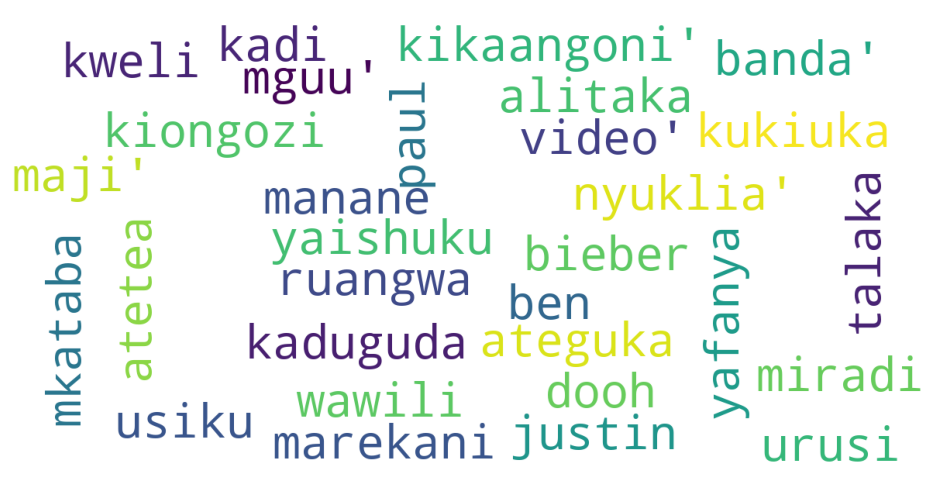

In [44]:
# show world cloud

headlines = "".join(data['headlines'].tolist())
explore_wordcloud(data['headlines'].values)

### 5. Word Length Analysis

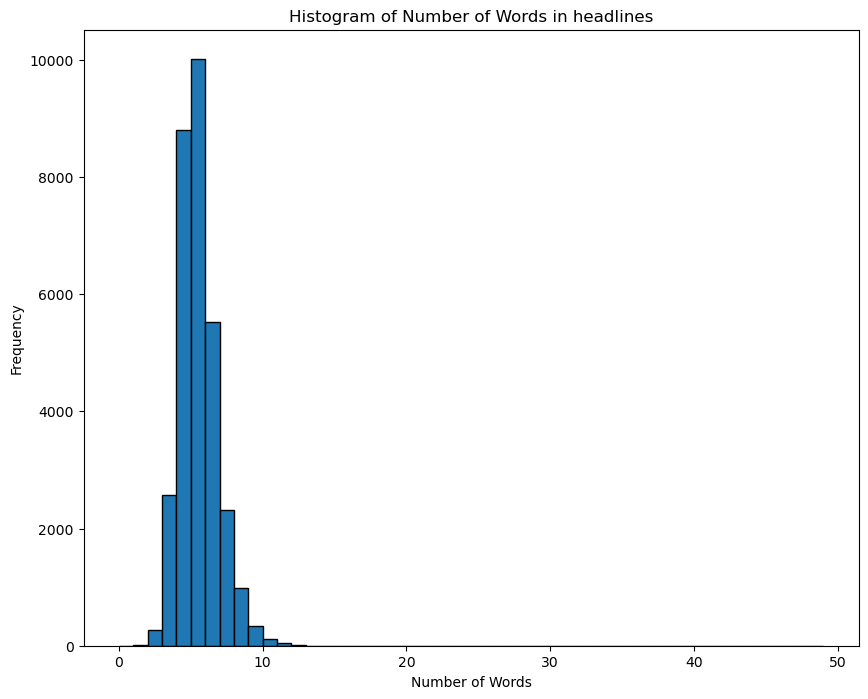

In [42]:
# Tokenize the sentences into words and calculate the word count
data['word_count'] = data['headlines'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,8))
# Create the histogram
plt.hist(data['word_count'], bins=range(0, 50), edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Number of Words in headlines')

# Show the plot
plt.show()

In [43]:
#save cleaned data

data.to_csv('../Data/swahili_news_titles_clean_data.csv', index=False)